In [1]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
calc_popts = np.load('../monit_npy/nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_21/regression_calc_popts.npy')

In [5]:
pred_popts = np.load('../monit_npy/nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_21/regression_preds_popts.npy')

In [8]:
def weight_fun(x, a, b, c):
    return a + b * np.cos(x) + c * np.sin(x)

In [9]:
calc_popts.shape

(100000, 3)

In [13]:
def generate_predicted_classes(num_classes, popts):
    classes = np.linspace(0, 2, num_classes) * np.pi
    data_len = popts.shape[0]
    weights = np.zeros((data_len, num_classes))
    for i in range(data_len):
        weights[i] = weight_fun(classes, *popts[i])
    return weights

In [21]:
def calculate_metrics(num_class, calc_popts, pred_popts):
    calc_w = generate_predicted_classes(num_class, calc_popts)
    preds_w = generate_predicted_classes(num_class, pred_popts)
    #calc_w = calc_w / np.tile(np.reshape(np.sum(calc_w, axis=1), (-1, 1)), (1, num_class))
    #preds_w = calc_w / np.tile(np.reshape(np.sum(preds_w, axis=1), (-1, 1)), (1, num_class))
    pred_arg_maxs = np.argmax(preds_w, axis=1)
    calc_arg_maxs = np.argmax(calc_w, axis=1)
    calc_pred_argmaxs_distances = np.min(
       np.stack(
           [np.abs(pred_arg_maxs-calc_arg_maxs), (num_class - np.abs(pred_arg_maxs-calc_arg_maxs))]
       ), axis=0)
    den = np.abs(pred_arg_maxs-calc_arg_maxs)
    den[den==0]=1
    direction = (pred_arg_maxs-calc_arg_maxs)/den
    calc_pred_argmaxs_distances *= np.int32(direction)
    acc0 = (calc_pred_argmaxs_distances <= 0).mean()
    acc1 = (calc_pred_argmaxs_distances <= 1).mean()
    acc2 = (calc_pred_argmaxs_distances <= 2).mean()
    acc3 = (calc_pred_argmaxs_distances <= 3).mean()
    
    mean_error = np.mean(calc_pred_argmaxs_distances)
    l1_delta_w = np.mean(np.abs(calc_w - preds_w))
    l2_delta_w = np.sqrt(np.mean((calc_w - preds_w)**2))
    
    return np.array([acc0, acc1, acc2, acc3, mean_error, l1_delta_w, l2_delta_w])

In [22]:
metrics = [calculate_metrics(i+2, calc_popts, pred_popts) for i in range(49)]

In [23]:
metrics = np.stack(metrics)

# Accuracy

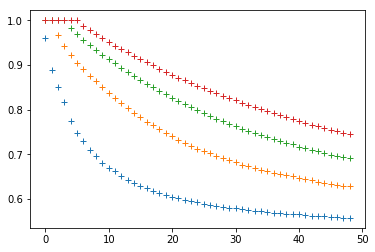

In [24]:
plt.plot(metrics[:, 0],'+')
plt.plot(metrics[:, 1],'+')
plt.plot(metrics[:, 2],'+')
plt.plot(metrics[:, 3],'+')



# L1 Distance

Text(0,0.5,'l1')

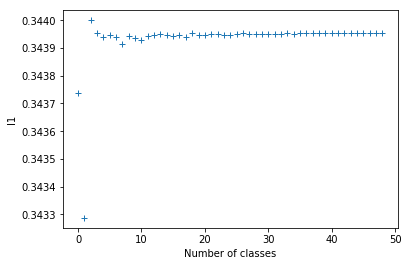

In [34]:
plt.plot(metrics[:, 5], '+')
plt.xlabel("Number of classes")
plt.ylabel('l1')

# L2 distance

Text(0,0.5,'l1')

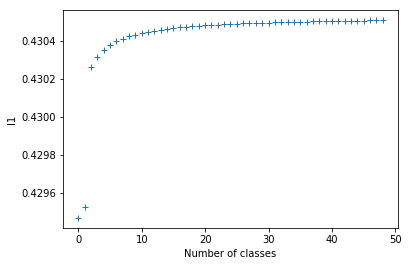

In [33]:
plt.plot(metrics[:, 6], '+')
plt.xlabel("Number of classes")
plt.ylabel('l1')

In [37]:
    def plot_distr(num_class, calc_popts, pred_popts):

    calc_w = generate_predicted_classes(num_class, calc_popts)
    preds_w = generate_predicted_classes(num_class, pred_popts)
    pred_arg_maxs = np.argmax(preds_w, axis=1)
    calc_arg_maxs = np.argmax(calc_w, axis=1)
    
    distances_in_both_directions = np.stack(
        [(pred_arg_maxs-calc_arg_maxs), (num_class-calc_arg_maxs+pred_arg_maxs -1), (num_class-calc_arg_maxs+pred_arg_maxs+1)], axis=0)
    
    choice_of_direction = np.argmin(np.abs(distances_in_both_directions), axis=0)
    calc_pred_argmaxs_distances = distances_in_both_directions[choice_of_direction]
       
    
    plt.hist(calc_pred_argmaxs_distances, histtype='step')
    
    plt.xlabel('Prediction error distance')
    

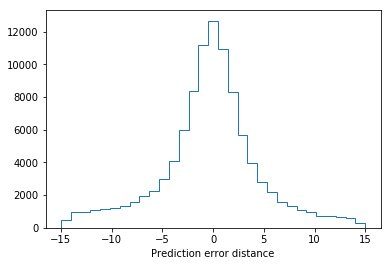

In [38]:
i = 30
plot_distr(i, calc_popts, pred_popts)

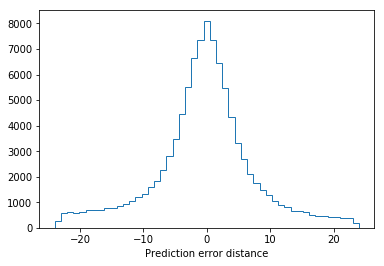

In [39]:
i = 48
plot_distr(i, calc_popts, pred_popts)

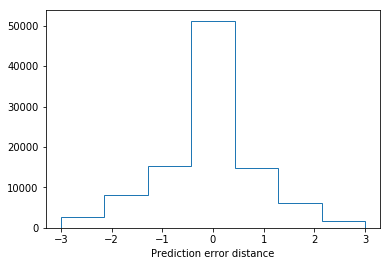

In [40]:
i = 6
plot_distr(i, calc_popts, pred_popts)

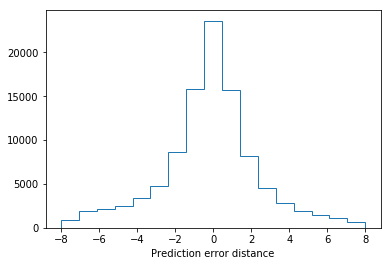

In [41]:
i = 16
plot_distr(i, calc_popts, pred_popts)

# plots

In [43]:
xs = np.linspace(0, 2*np.pi, 100)

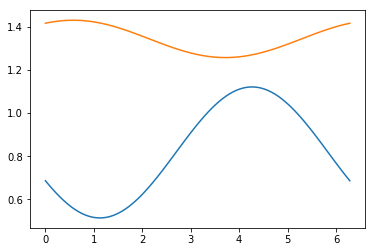

In [46]:
i=100
plt.plot(xs, weight_fun(xs, *calc_popts[i]))
plt.plot(xs, weight_fun(xs, *pred_popts[i]))

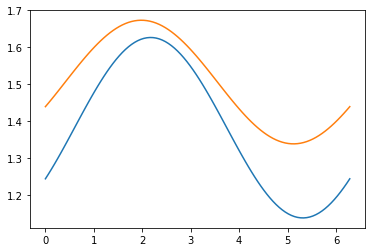

In [48]:
i=200
plt.plot(xs, weight_fun(xs, *calc_popts[i]))
plt.plot(xs, weight_fun(xs, *pred_popts[i]))

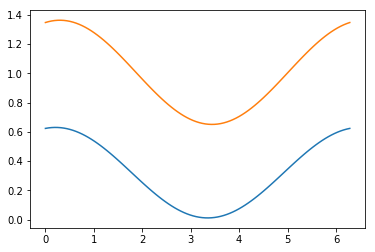

In [49]:
i=300
plt.plot(xs, weight_fun(xs, *calc_popts[i]))
plt.plot(xs, weight_fun(xs, *pred_popts[i]))

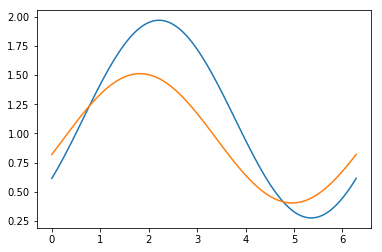

In [50]:
i=400
plt.plot(xs, weight_fun(xs, *calc_popts[i]))
plt.plot(xs, weight_fun(xs, *pred_popts[i]))

# Distance between maximums

In [59]:
from scipy.optimize import fminbound

In [65]:
fminbound(lambda x: -weight_fun(x, *calc_popts[400]), x1=0, x2=2*np.pi)

In [67]:
max_calc = np.array([fminbound(lambda x: -weight_fun(x, *popt), x1=0, x2=2*np.pi) for popt in calc_popts])

In [68]:
max_pred = np.array([fminbound(lambda x: -weight_fun(x, *popt), x1=0, x2=2*np.pi) for popt in pred_popts])

In [78]:
min_distances = np.zeros(len(max_calc))
for i in range(len(max_calc)):
    dist = max_pred[i] - max_calc[i]
    if np.abs(2*np.pi + max_pred[i] - max_calc[i])<np.abs(dist):
        dist = 2*np.pi + max_pred[i] - max_calc[i]
    if np.abs(-2*np.pi + max_pred[i] - max_calc[i])<np.abs(dist):
        dist = -2*np.pi + max_pred[i] - max_calc[i]
    min_distances[i]  = dist

In [73]:
np.mean(np.abs(max_calc-max_pred))

1.18067735341287

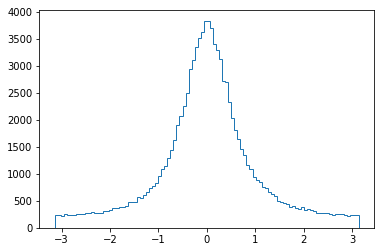

In [83]:
a=plt.hist(min_distances,histtype='step', bins=100)